In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(
    "data.csv",
    encoding="latin1",
    usecols=["no2"],
    low_memory=False
)

x = pd.to_numeric(df["no2"], errors="coerce").dropna().values
print("Total NO2 samples:", len(x))

Total NO2 samples: 419509


In [5]:
r=102303930

a_r = 0.5 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)


a_r = 0.5
b_r = 0.3


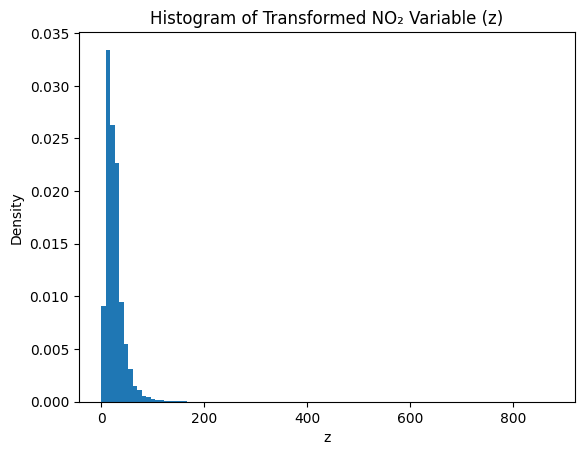

In [6]:
z = x + a_r * np.sin(b_r * x)

plt.hist(z, bins=100, density=True)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram of Transformed NO₂ Variable (z)")
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"

z_real = torch.tensor(z, dtype=torch.float32).view(-1,1).to(device)


In [32]:
import torch
import torch.nn as nn
class Generator(nn.Module):

  def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),


            nn.Linear(64, 1)
        )

  def forward(self, noise):
        z_fake = self.net(noise)
        return z_fake


In [33]:
import torch
import torch.nn as nn
class Generator(nn.Module):

  def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),


            nn.Linear(64, 1)
        )

  def forward(self, noise):
        z_fake = self.net(noise)
        return z_fake


In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()

optimizer_G = torch.optim.Adam(
    G.parameters(),
    lr=0.0005,
)

optimizer_D = torch.optim.Adam(
    D.parameters(),
    lr=0.0005,
)


In [42]:
epochs = 15000
batch_size = 64

for epoch in range(epochs):
    idx = torch.randint(0, z_real.size(0), (batch_size,))
    real_samples = z_real[idx]

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    noise = torch.randn(batch_size, 1).to(device)
    fake_samples = G(noise)

    loss_D = criterion(D(real_samples), real_labels) + \
             criterion(D(fake_samples.detach()), fake_labels)

    optimizer_D.zero_grad()
    loss_D.backward()
    optimizer_D.step()


    noise = torch.randn(batch_size, 1).to(device)
    fake_samples = G(noise)

    loss_G = criterion(D(fake_samples), real_labels)

    optimizer_G.zero_grad()
    loss_G.backward()
    optimizer_G.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, D Loss: {loss_D.item():.4f}, G Loss: {loss_G.item():.4f}")


Epoch 0, D Loss: 1.3861, G Loss: 0.7123
Epoch 500, D Loss: 1.3976, G Loss: 0.6141
Epoch 1000, D Loss: 1.3845, G Loss: 0.6828
Epoch 1500, D Loss: 1.3863, G Loss: 0.7029
Epoch 2000, D Loss: 1.3870, G Loss: 0.6950
Epoch 2500, D Loss: 1.3866, G Loss: 0.6948
Epoch 3000, D Loss: 1.3867, G Loss: 0.6946
Epoch 3500, D Loss: 1.3850, G Loss: 0.6865
Epoch 4000, D Loss: 1.3833, G Loss: 0.7128
Epoch 4500, D Loss: 1.3872, G Loss: 0.6937
Epoch 5000, D Loss: 1.3839, G Loss: 0.7097
Epoch 5500, D Loss: 1.3851, G Loss: 0.7051
Epoch 6000, D Loss: 1.3895, G Loss: 0.6671
Epoch 6500, D Loss: 1.3820, G Loss: 0.6536
Epoch 7000, D Loss: 1.3883, G Loss: 0.6927
Epoch 7500, D Loss: 1.3856, G Loss: 0.6642
Epoch 8000, D Loss: 1.3801, G Loss: 0.6657
Epoch 8500, D Loss: 1.3862, G Loss: 0.6836
Epoch 9000, D Loss: 1.3849, G Loss: 0.7107
Epoch 9500, D Loss: 1.3789, G Loss: 0.7300
Epoch 10000, D Loss: 1.3826, G Loss: 0.6942
Epoch 10500, D Loss: 1.3711, G Loss: 0.6649
Epoch 11000, D Loss: 1.3812, G Loss: 0.6819
Epoch 11500,

In [43]:
G.eval()
with torch.no_grad():
    z_fake = G(torch.randn(50000, 1).to(device)).cpu().numpy()


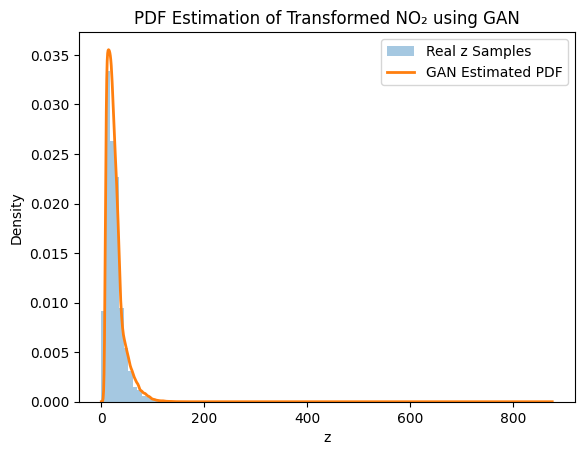

In [44]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(z_fake.flatten())
z_axis = np.linspace(z.min(), z.max(), 1000)
pdf_est = kde(z_axis)

plt.hist(z, bins=100, density=True, alpha=0.4, label="Real z Samples")
plt.plot(z_axis, pdf_est, label="GAN Estimated PDF", linewidth=2)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("PDF Estimation of Transformed NO₂ using GAN")
plt.legend()
plt.show()
